In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def func_rosen(x):
    r = np.sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2, axis=0)
    return r

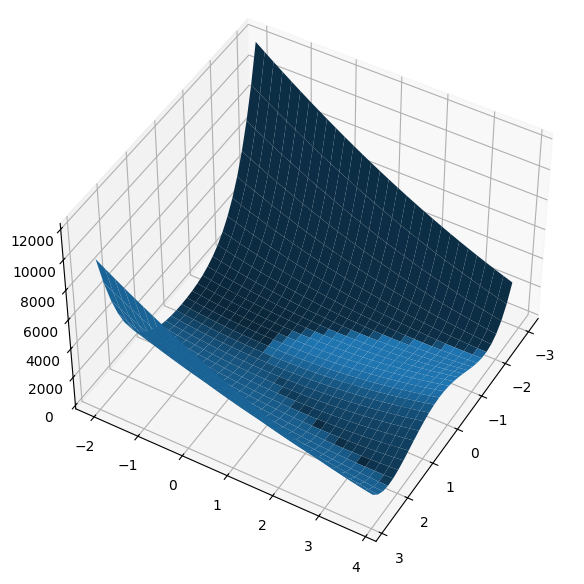

In [82]:
graph = plt.figure(figsize=(7, 10))
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, .2)
x2 = np.arange(-2, 4, .2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1, x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show();

In [83]:
from scipy.optimize import minimize, least_squares

In [84]:
x1 = np.array([2.4, 1.5, 2.1, .7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


In [85]:
x1 = np.array([2.4, 1.5, 2.1, .7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [86]:
x1 = np.array([2.4, 1.5, 2.1, .7, 1.1])
res = least_squares(func_rosen, x1)
print(res.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


In [87]:
from sympy import solve, symbols, init_printing

In [88]:
a, b, w = symbols('a b w')
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b:\n f =', g)
q = a + b - 200 
print('Функция ограничений: ', q, '= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лангранжа: \n', f)
fa = f.diff(a)
print('df/da =', fa, '= 0')
fb = f.diff(b)
print('df/da =', fb, '= 0')
fw = f.diff(w)
print('df/da =', fw, '= 0')
sols = solve([fa, fb, fw], a, b, w)
print('Стационарная точка М(x, y):\n', float(sols[a]), ',', float(sols[b]))

Целевая функция для аргументов a и b:
 f = 3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лангранжа: 
 3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/da = 10*b + w + 4 = 0
df/da = a + b - 200 = 0
Стационарная точка М(x, y):
 125.1875 , 74.8125


In [89]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 lambda_1 lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]
